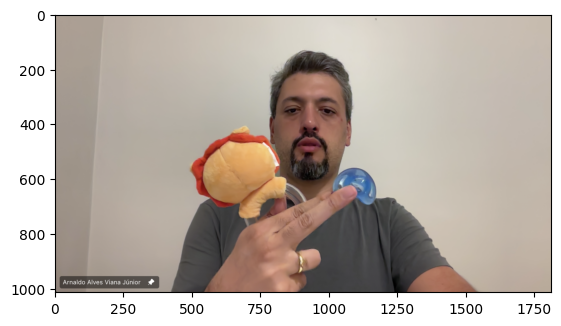

In [54]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('image.png')  ### está em BGR
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  ### converte para RGB
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


plt.imshow(image_rgb)

plt.show()


In [19]:
image_hsv[600,1100]

array([106,  87, 175], dtype=uint8)

32


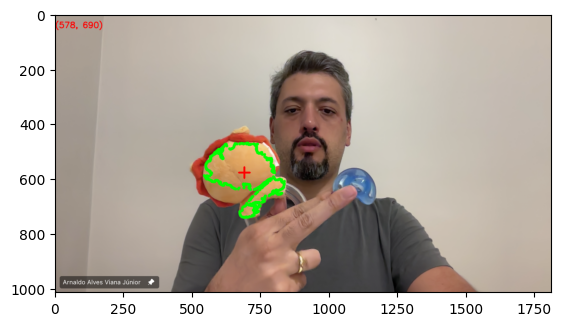

In [55]:
### encontrando o leao
                           # 15, 142, 201
lower_amarelo = np.array([12, 120, 180])  
upper_amarelo = np.array([18, 180, 255])

# Cria a mascara
mask_amarelo = cv2.inRange(image_hsv, lower_amarelo, upper_amarelo)


# ----

contornos_amarelo, _ = cv2.findContours(mask_amarelo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contornos_amarelo))

amarelo_rgb =image_rgb.copy()

maior_amarelo = max(contornos_amarelo, key = cv2.contourArea)
cv2.drawContours(amarelo_rgb, maior_amarelo, -1, (0, 255, 0), 10)


# ------

M = cv2.moments(maior_amarelo)
if M['m00'] != 0:
    cx_am = int(M['m10']/M['m00'])
    cy_am = int(M['m01']/M['m00'])


# print("centro de massa na possição amarelo: ",cx, cy)


size = 20
color = (255,0,0)


cv2.line(amarelo_rgb,(cx_am - size,cy_am),(cx_am + size,cy_am),color,5)
cv2.line(amarelo_rgb,(cx_am,cy_am - size),(cx_am, cy_am + size),color,5)

# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy_am , cx_am
origem = (0,50)

cv2.putText(amarelo_rgb, str(text), origem, font,1,color,2,cv2.LINE_AA)



plt.imshow(amarelo_rgb, cmap='gray')
plt.show()  

2


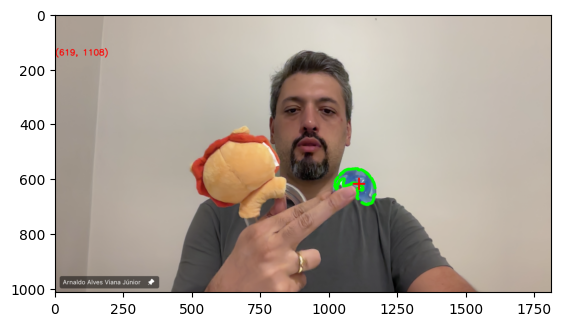

In [56]:
### encontrando a azul
                           # 106,  87, 175
lower_azul = np.array([90, 80, 100])  
upper_azul = np.array([115, 200, 255])

# Cria a mascara
mask_azul = cv2.inRange(image_hsv, lower_azul, upper_azul)



# ----

contornos_azul, _ = cv2.findContours(mask_azul, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contornos_azul))

azul_rgb =image_rgb.copy()

maior_azul = max(contornos_azul, key = cv2.contourArea)
cv2.drawContours(azul_rgb, maior_azul, -1, (0, 255, 0), 10)

# -----



M = cv2.moments(maior_azul)
if M['m00'] != 0:
    cx_az = int(M['m10']/M['m00'])
    cy_az = int(M['m01']/M['m00'])


# print("centro de massa na possição azul: ",cx, cy)


size = 20
color = (255,0,0)


cv2.line(azul_rgb,(cx_az - size,cy_az),(cx_az + size,cy_az),color,5)
cv2.line(azul_rgb,(cx_az,cy_az - size),(cx_az, cy_az + size),color,5)

# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy_az , cx_az
origem = (0,150)

cv2.putText(azul_rgb, str(text), origem, font,1,color,2,cv2.LINE_AA)



plt.imshow(azul_rgb, cmap='gray')
plt.show()  

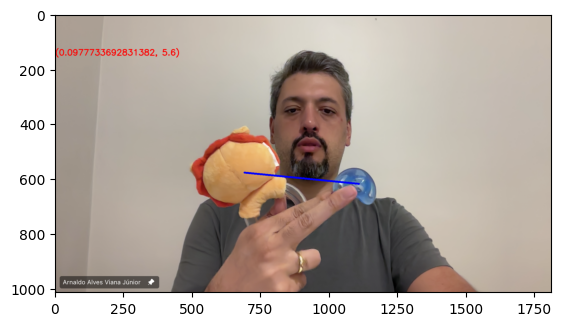

In [57]:


cv2.line(image_rgb,(cx_am,cy_am),(cx_az,cy_az),(0,0,255),5)

angulo = np.arctan2(cy_az - cy_am, cx_az - cx_am)
angulo_graus = np.degrees(angulo)
angulo_graus = round(angulo_graus, 2)


text = angulo, angulo_graus
origem = (0,150)

cv2.putText(image_rgb, str(text), origem, font,1,color,2,cv2.LINE_AA)

plt.imshow(image_rgb)
plt.show()